In [5]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
# Function to implement the CPPI strategy
def cppi_simulation(stock_prices, floor_value, m, n, num_simulations):
    results = []
    for _ in range(num_simulations):
        wealth = m
        cushion = 1.0

        for i in range(1, len(stock_prices)):
            cushion = (wealth - floor_value) / wealth
            risky_asset = cushion * wealth
            risk_free_asset = wealth - risky_asset
            wealth = risky_asset * stock_prices[i] / stock_prices[i - 1] + risk_free_asset

        results.append(wealth)
    return results

In [7]:
# Function to implement the GBM strategy
def gbm_simulation(initial_price, drift, volatility, n_steps, n_simulations, dt=1.0):
    results = []
    for _ in range(n_simulations):
        price = initial_price
        for _ in range(n_steps):
            price *= np.exp((drift - 0.5 * volatility ** 2) * dt + volatility * np.sqrt(dt) * np.random.randn())
        results.append(price)
    return results

In [8]:
# Fetching stock data from yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    return stock_data

In [9]:
# Parameters for CPPI simulation
m = 1000000  # Initial investment
floor_value = 800000  # Floor value, CPPI strategy will not let the wealth go below this value

In [10]:
# Parameters for GBM simulation
initial_price = 100  # Initial stock price
drift = 0.05  # Average return (drift) of the stock
volatility = 0.2  # Volatility of the stock
n_steps = 252  # Number of trading days in a year
n_simulations = 1000  # Number of simulations

In [11]:
# Fetching stock data
ticker = 'AAPL'  # You can change the ticker symbol to any other valid symbol
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = fetch_stock_data(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [12]:
# Running simulations
cppi_results = cppi_simulation(stock_data, floor_value, m, n_steps, n_simulations)
gbm_results = gbm_simulation(initial_price, drift, volatility, n_steps, n_simulations)

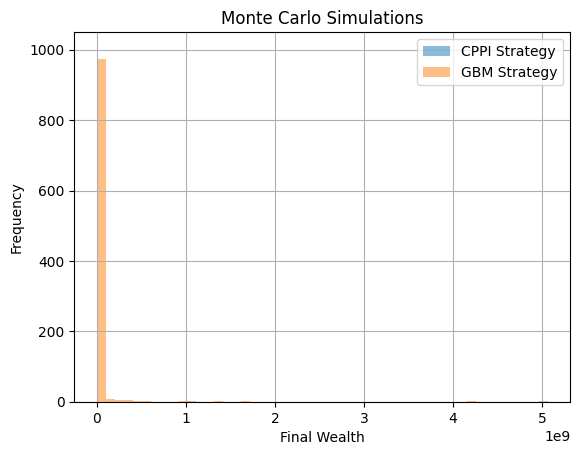

In [14]:
# Interactive plots
plt.hist(cppi_results, bins=50, alpha=0.5, label='CPPI Strategy')
plt.hist(gbm_results, bins=50, alpha=0.5, label='GBM Strategy')
plt.xlabel('Final Wealth')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulations')
plt.legend()
plt.grid(True)
plt.show()